In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Task 1: Data Preparation

In [2]:
# Load datasets
c_df = pd.read_csv(r"C:\\Users\\Krishna Baraskar\\OneDrive\\Desktop\\Predicting Loan Default\\customer_financial_data.csv")

In [3]:
# Display the first few rows of each dataset
print("Customer Financial Data:")
c_df.head()

Customer Financial Data:


,Customer_ID,Name,Age,Gender,Annual_Income,Credit_Score,Total_Debt,Employment_Status
0,C00000001,David Taylor,56,Male,133324.57,409,46843.40,Unemployed
1,C00000002,Edward Grant,69,Male,161664.22,771,34325.10,Unemployed
2,C00000003,Robert Mosley,46,Male,41999.98,696,45115.08,Unemployed
3,C00000004,Emily Cunningham,32,Male,125164.68,657,13464.71,Self-Employed
4,C00000005,Mr. Jorge Gordon,60,Male,35377.38,811,35849.70,Self-Employed


In [4]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        50000 non-null  object 
 1   Name               50000 non-null  object 
 2   Age                50000 non-null  int64  
 3   Gender             50000 non-null  object 
 4   Annual_Income      50000 non-null  float64
 5   Credit_Score       50000 non-null  int64  
 6   Total_Debt         50000 non-null  float64
 7   Employment_Status  50000 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [5]:
# Duplicate data 
c_df.duplicated().sum()

0

In [6]:
# Loading 2nd Dataset
l_df = pd.read_csv(r"C:\\Users\\Krishna Baraskar\\OneDrive\\Desktop\\Predicting Loan Default\\loan_information_data.csv")

In [7]:
print("\nLoan Information Data:")
l_df.head()


Loan Information Data:


,Loan_ID,Customer_ID,Loan_Amount,Interest_Rate,Loan_Term,Loan_Start_Date
0,L00000001,C00026785,40594.38,13.93,60 months,2024-06-04
1,L00000002,C00011497,38966.87,5.90,12 months,2023-09-02
2,L00000003,C00007333,29180.92,8.56,60 months,2020-08-08
3,L00000004,C00021003,31714.71,9.48,48 months,2024-06-17
4,L00000005,C00026374,19542.04,12.19,24 months,2022-10-03


In [8]:
l_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Loan_ID          100000 non-null  object 
 1   Customer_ID      100000 non-null  object 
 2   Loan_Amount      100000 non-null  float64
 3   Interest_Rate    100000 non-null  float64
 4   Loan_Term        100000 non-null  object 
 5   Loan_Start_Date  100000 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.6+ MB


In [9]:
l_df['Loan_Start_Date'] = pd.to_datetime(l_df['Loan_Start_Date'], errors='coerce').dt.date

In [10]:
l_df['Loan_Term'] = l_df['Loan_Term'].str.extract('(\d+)').astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Krishna Baraskar\AppData\Local\Temp\ipykernel_7848\3785764997.py:1: SyntaxWarning: invalid escape sequence '\d'
  l_df['Loan_Term'] = l_df['Loan_Term'].str.extract('(\d+)').astype(int)


In [11]:
# Duplicate data 
l_df.duplicated().sum()

0

In [12]:
l_df.head()

,Loan_ID,Customer_ID,Loan_Amount,Interest_Rate,Loan_Term,Loan_Start_Date
0,L00000001,C00026785,40594.38,13.93,60,2024-06-04
1,L00000002,C00011497,38966.87,5.90,12,2023-09-02
2,L00000003,C00007333,29180.92,8.56,60,2020-08-08
3,L00000004,C00021003,31714.71,9.48,48,2024-06-17
4,L00000005,C00026374,19542.04,12.19,24,2022-10-03


In [13]:
# Loading 3rd Dataset
d_df = pd.read_csv(r"C:\\Users\\Krishna Baraskar\\OneDrive\\Desktop\\Predicting Loan Default\\historical_default_data.csv")

In [14]:
print("\nHistorical Default Data:")
d_df.head()


Historical Default Data:


,Loan_ID,Default
0,L00000001,0
1,L00000002,0
2,L00000003,0
3,L00000004,0
4,L00000005,0


In [15]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Loan_ID  100000 non-null  object
 1   Default  100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [16]:
# Duplicate data 
d_df.duplicated().sum()

0

Task 2: Data Merging

In [17]:
# Merge customer financial data with loan information data on Customer_ID
merged_df = pd.merge(c_df, l_df, on='Customer_ID', how='inner')

# Merging merged dataset with historical default data on Loan_ID
df = pd.merge(merged_df, d_df, on='Loan_ID', how='inner')

# final data set
df.head()

,Customer_ID,Name,Age,Gender,Annual_Income,Credit_Score,Total_Debt,Employment_Status,Loan_ID,Loan_Amount,Interest_Rate,Loan_Term,Loan_Start_Date,Default
0,C00000001,David Taylor,56,Male,133324.57,409,46843.4,Unemployed,L00008450,13609.97,13.06,12,2023-07-04,0
1,C00000001,David Taylor,56,Male,133324.57,409,46843.4,Unemployed,L00044202,10452.72,12.94,36,2023-01-17,0
2,C00000002,Edward Grant,69,Male,161664.22,771,34325.1,Unemployed,L00029698,12467.19,14.23,24,2020-11-17,0
3,C00000002,Edward Grant,69,Male,161664.22,771,34325.1,Unemployed,L00054533,11949.17,8.99,24,2021-12-23,0
4,C00000002,Edward Grant,69,Male,161664.22,771,34325.1,Unemployed,L00055949,16229.21,4.65,60,2020-11-15,0


Task 3: Exploratory Data Analysis (EDA)

In [18]:
df[['Annual_Income', 'Credit_Score', 'Total_Debt', 'Loan_Amount', 'Interest_Rate', 'Loan_Term']].describe()

,Annual_Income,Credit_Score,Total_Debt,Loan_Amount,Interest_Rate,Loan_Term
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,110037.548326,573.315240,25008.851460,25463.415150,8.757237,35.993520
std,51932.949696,159.160983,14440.521643,14140.155291,3.602871,16.975482
min,20001.520000,300.000000,0.240000,1000.110000,2.500000,12.000000
25%,64641.622500,434.000000,12454.260000,13205.845000,5.640000,24.000000
50%,110469.230000,573.000000,24989.530000,25439.710000,8.780000,36.000000
75%,155140.490000,712.000000,37468.600000,37713.075000,11.860000,48.000000
max,199998.570000,849.000000,49999.150000,49999.740000,15.000000,60.000000


In [19]:
# Loan Default Distribution:
df['Default'].value_counts(normalize=True)

Default
0    0.85083
1    0.14917
Name: proportion, dtype: float64

C:\Users\Krishna Baraskar\AppData\Local\Temp\ipykernel_7848\2730948318.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Employment_Status', data=df, palette='coolwarm')
C:\Users\Krishna Baraskar\AppData\Local\Temp\ipykernel_7848\2730948318.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Default', data=df, palette='coolwarm')


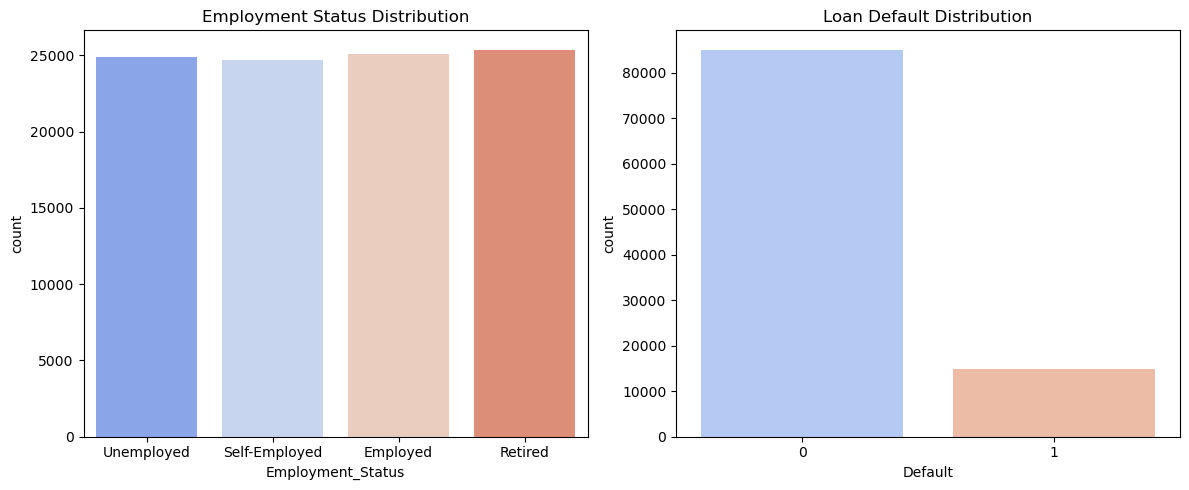

In [20]:
# Plot distribution of categorical features like Employment_Status and Default
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Employment_Status', data=df, palette='coolwarm')
plt.title('Employment Status Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Default', data=df, palette='coolwarm')
plt.title('Loan Default Distribution')

plt.tight_layout()
plt.show()


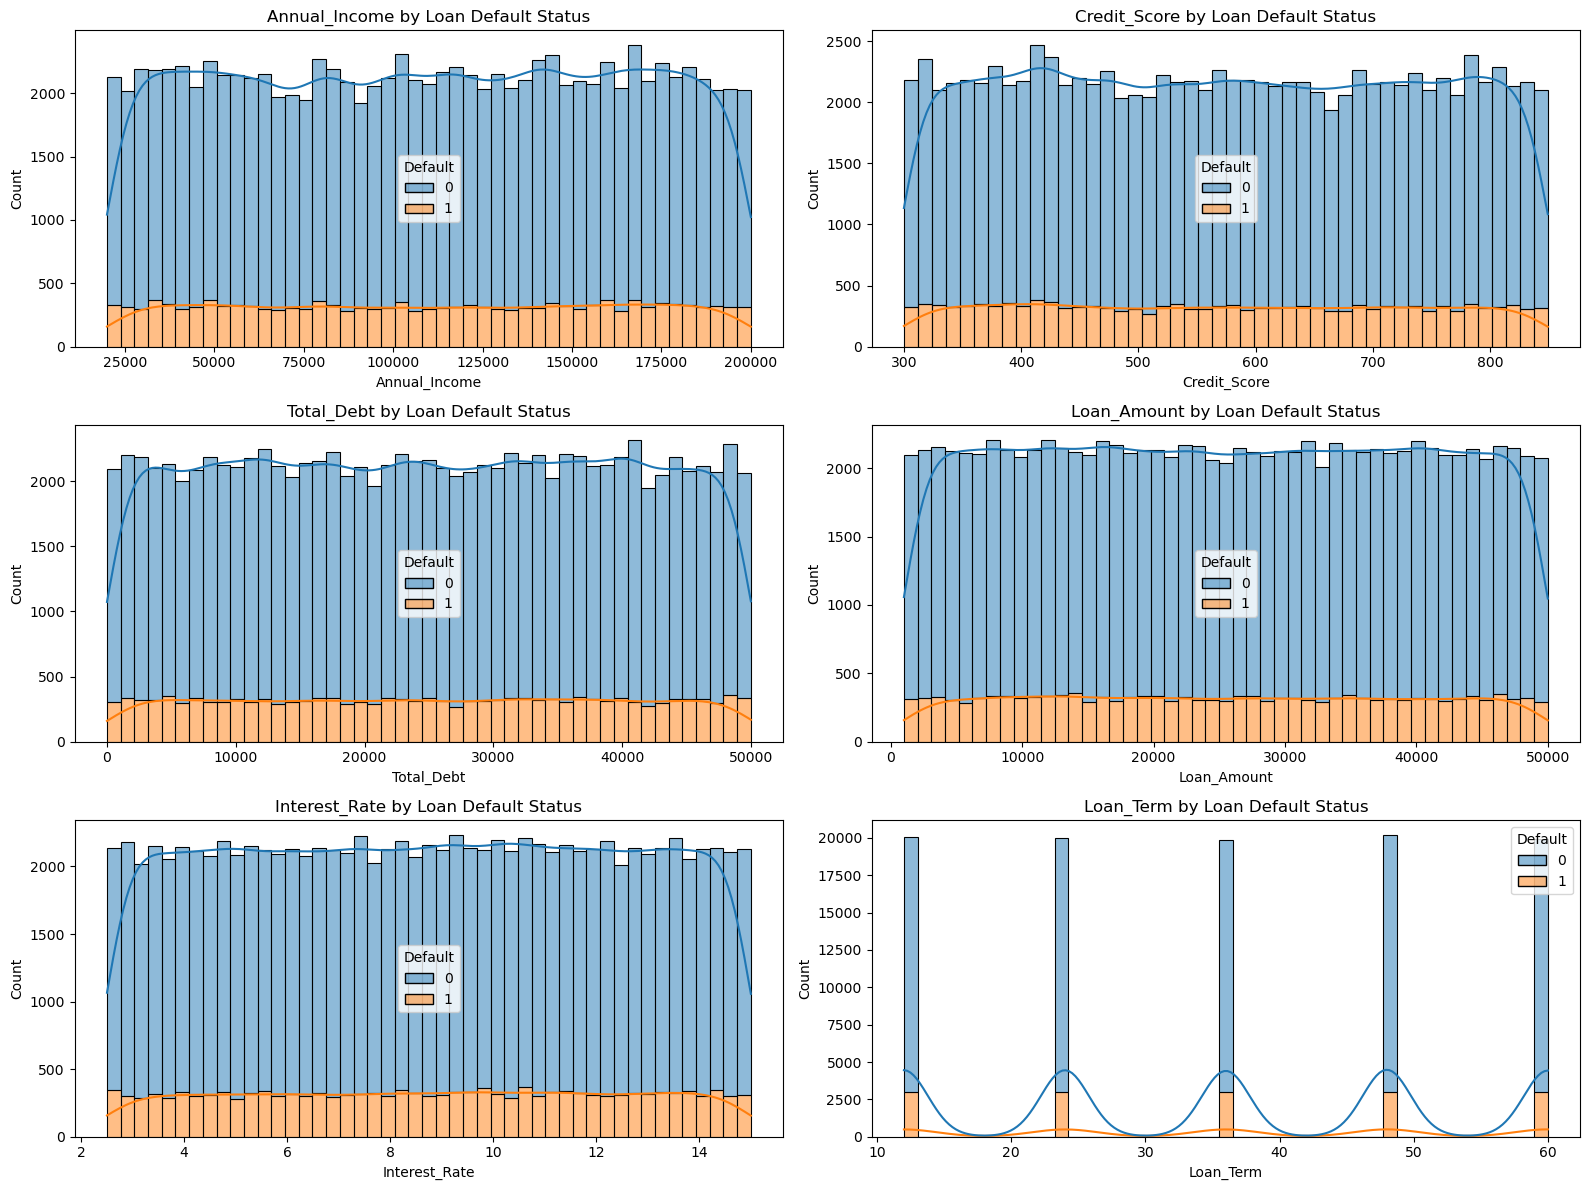

In [21]:
# Compare distributions of key features between default and non-default loans
n_features = ['Annual_Income', 'Credit_Score', 'Total_Debt', 'Loan_Amount', 'Interest_Rate', 'Loan_Term']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(n_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=feature, hue='Default', kde=True, multiple='stack')
    plt.title(f'{feature} by Loan Default Status')
plt.tight_layout()
plt.show()


In [22]:
c_matrix = df[['Annual_Income', 'Credit_Score', 'Total_Debt', 'Loan_Amount', 'Interest_Rate', 'Loan_Term', 'Default']].corr()
c_matrix

,Annual_Income,Credit_Score,Total_Debt,Loan_Amount,Interest_Rate,Loan_Term,Default
Annual_Income,1.000000,-0.006280,0.002991,-0.001787,0.004690,0.001745,0.001061
Credit_Score,-0.006280,1.000000,-0.003010,0.000909,0.000342,-0.002185,-0.004635
Total_Debt,0.002991,-0.003010,1.000000,0.000142,-0.001052,-0.001263,0.002291
Loan_Amount,-0.001787,0.000909,0.000142,1.000000,0.004055,0.001095,-0.001824
Interest_Rate,0.004690,0.000342,-0.001052,0.004055,1.000000,-0.001498,0.004065
Loan_Term,0.001745,-0.002185,-0.001263,0.001095,-0.001498,1.000000,0.001846
Default,0.001061,-0.004635,0.002291,-0.001824,0.004065,0.001846,1.000000


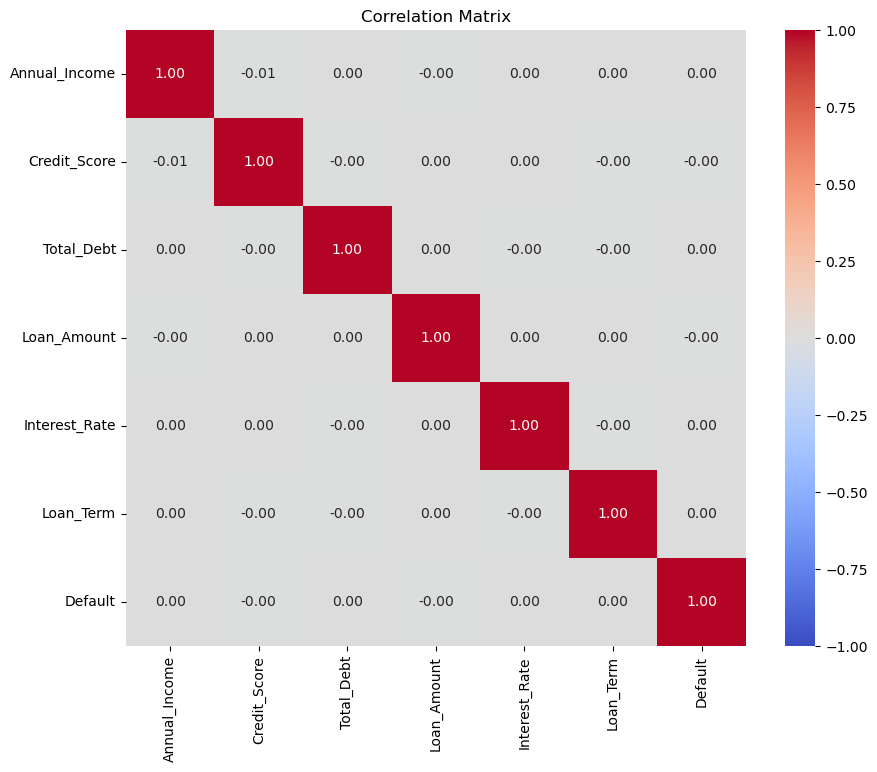

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Task 4.1: Create New Features

- Debt-to-Income Ratio: This measures the ratio of total debt to annual income.
- Average Loan Amount per Customer: This will help identify customers who consistently take higher loans.
- Loan-to-Income Ratio: This measures the ratio of the loan amount to the annual income.

In [24]:
df['Debt_to_Income_Ratio'] = round(df['Total_Debt'] / df['Annual_Income'],2)

In [25]:
df['Avg_Loan_Amount'] = round(df.groupby('Customer_ID')['Loan_Amount'].transform('mean'),2)

In [26]:
df['Loan_to_Income_Ratio'] = round(df['Loan_Amount'] / df['Annual_Income'],2)

In [27]:
columns_to_remove = ['Customer_ID', 'Name', 'Age', 'Gender', 'Loan_ID', 'Loan_Start_Date']
df = df.drop(columns=columns_to_remove)

Task 4.2: Encode Categorical Variables and Normalize Numerical Features

In [28]:
employment_status_mapping = {
    'Unemployed': 0,
    'Self-Employed': 2,
    'Employed': 3,
    'Retired' : 1
}
df['Employment_Status'] = df['Employment_Status'].map(employment_status_mapping)

In [29]:
df.head()

,Annual_Income,Credit_Score,Total_Debt,Employment_Status,Loan_Amount,Interest_Rate,Loan_Term,Default,Debt_to_Income_Ratio,Avg_Loan_Amount,Loan_to_Income_Ratio
0,133324.57,409,46843.4,0,13609.97,13.06,12,0,0.35,12031.34,0.10
1,133324.57,409,46843.4,0,10452.72,12.94,36,0,0.35,12031.34,0.08
2,161664.22,771,34325.1,0,12467.19,14.23,24,0,0.21,13548.52,0.08
3,161664.22,771,34325.1,0,11949.17,8.99,24,0,0.21,13548.52,0.07
4,161664.22,771,34325.1,0,16229.21,4.65,60,0,0.21,13548.52,0.10


In [30]:
# Spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Default",axis=1), df["Default"], test_size=0.2, random_state=42)

In [31]:
# Apply scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [33]:
# # Logistic Regression
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [34]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': decision_tree
}

In [36]:
metrics_list = []

# Model Evaluation
for model_name, model in models.items():
    # Check if the model is Logistic Regression to apply scaled data
    if model_name == 'Logistic Regression':
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:  # For Decision Tree, use the non-scaled data
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

metrics_list

c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[{'Model': 'Logistic Regression',
  'Accuracy': 0.84825,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1-Score': 0.0,
  'ROC-AUC': 0.49988650924400513},
 {'Model': 'Decision Tree',
  'Accuracy': 0.73135,
  'Precision': 0.15208333333333332,
  'Recall': 0.1683690280065898,
  'F1-Score': 0.1598123534010946,
  'ROC-AUC': 0.5002175231397522}]

In [37]:
metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)

# Select the best model based on the ROC-AUC
best_model = metrics_df.loc[metrics_df['ROC-AUC'].idxmax()]
print(best_model)


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression   0.84825   0.000000  0.000000  0.000000  0.499887
1        Decision Tree   0.73135   0.152083  0.168369  0.159812  0.500218
Model        Decision Tree
Accuracy           0.73135
Precision         0.152083
Recall            0.168369
F1-Score          0.159812
ROC-AUC           0.500218
Name: 1, dtype: object


In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [40]:
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [41]:
# Best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params,best_score

({'criterion': 'gini',
  'max_depth': None,
  'min_samples_leaf': 4,
  'min_samples_split': 2},
 0.503427441644693)

In [42]:
# Train the model with the best parameters
best_decision_tree = grid_search.best_estimator_
best_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

In [43]:
y_pred = best_decision_tree.predict(X_test)
y_pred_proba = best_decision_tree.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

tuned_metrics = {
    'Model': 'Tuned Decision Tree',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'ROC-AUC': roc_auc
}

print("Tuned Decision Tree Performance:")
print(pd.DataFrame([tuned_metrics]))

Tuned Decision Tree Performance:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Tuned Decision Tree    0.7687   0.157555  0.120593  0.136618  0.497329


In [44]:
best_model = best_decision_tree

feature_importance = best_model.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                Feature  Importance
5         Interest_Rate    0.156049
4           Loan_Amount    0.141052
8       Avg_Loan_Amount    0.140286
2            Total_Debt    0.129404
0         Annual_Income    0.118161
1          Credit_Score    0.116034
9  Loan_to_Income_Ratio    0.065322
7  Debt_to_Income_Ratio    0.056416
6             Loan_Term    0.043780
3     Employment_Status    0.033495


In [45]:
from IPython.display import display, Markdown

display(Markdown("### Loan Default Prediction Report"))
display(Markdown("This report summarizes the analysis and model development for predicting loan defaults using various machine learning techniques."))

display(Markdown("#### Model Performance"))
display(Markdown("Below is the comparison of model performance metrics:"))
display(metrics_df)

display(Markdown("#### Feature Impact Analysis"))
display(Markdown("The following visualizations illustrate the impact of different features on loan defaults:"))


### Loan Default Prediction Report

This report summarizes the analysis and model development for predicting loan defaults using various machine learning techniques.

#### Model Performance

Below is the comparison of model performance metrics:

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.84825,0.000000,0.000000,0.000000,0.499887
1,Decision Tree,0.73135,0.152083,0.168369,0.159812,0.500218


#### Feature Impact Analysis

The following visualizations illustrate the impact of different features on loan defaults:

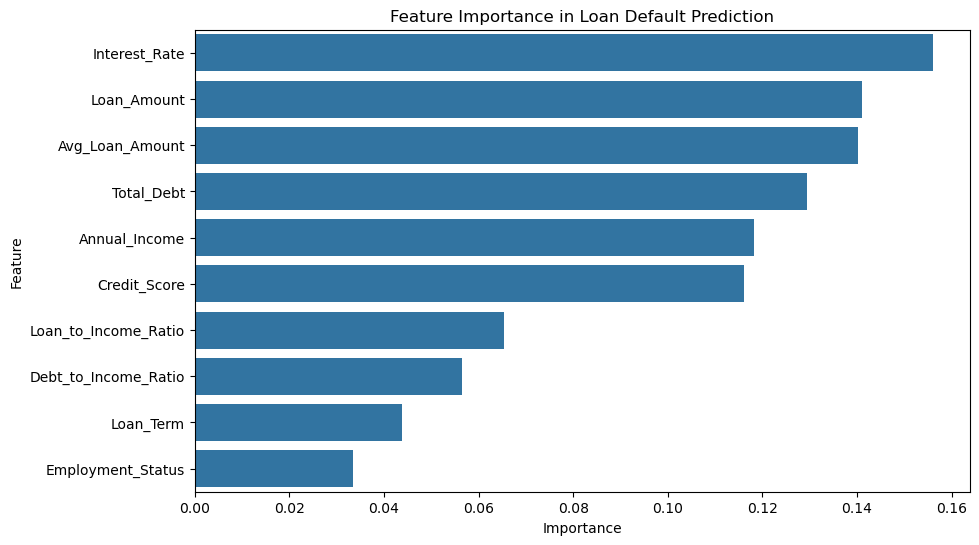

In [46]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Loan Default Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

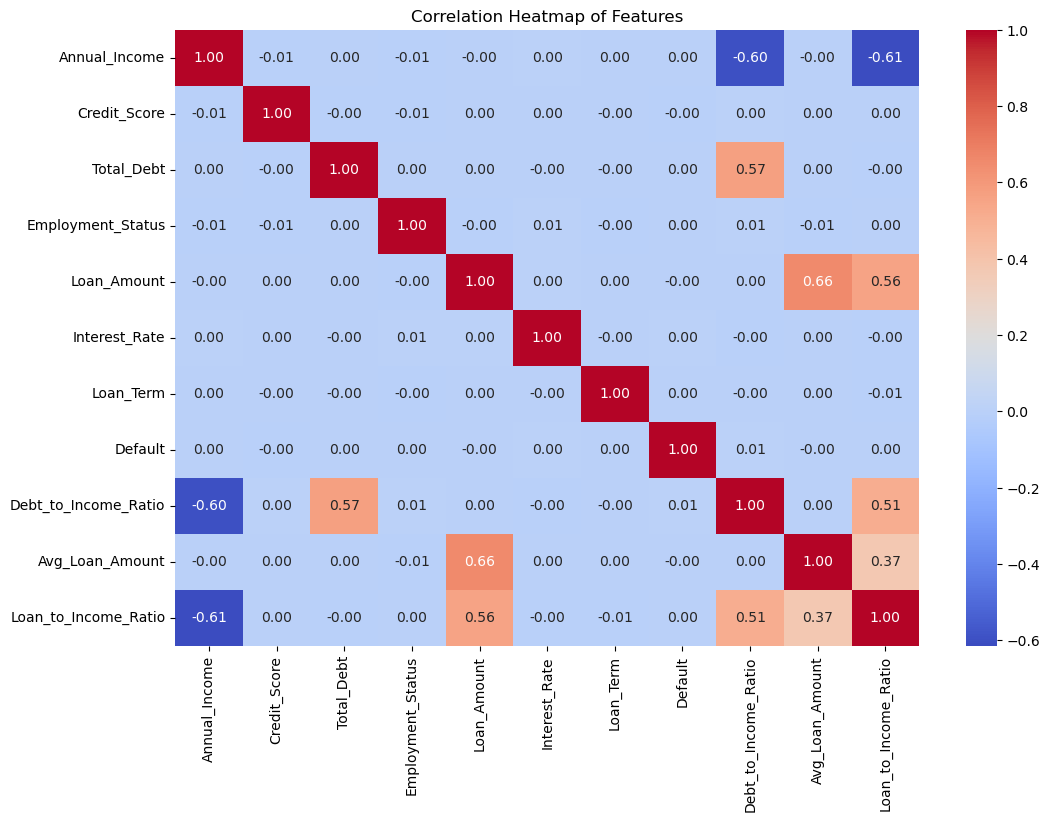

In [47]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


**Conclusion:**

The analysis identified the most impactful features on loan defaults and selected the best-performing model based on ROC-AUC. Further tuning and feature engineering could improve the model's predictive power.

In [49]:
best_model.predict(scaler.transform([[133324.57,409,46843.4,0,13609.97,13.06,12,0.35,12031.34,0.10]]))

c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Task 8.1: Save the Trained Model and Develop a User Interface for Real-Time Predictions

In [50]:
import joblib

# Assuming `best_model` is your final trained model
model_filename = 'loan_default_model.pkl'
joblib.dump(best_model, model_filename)


['loan_default_model.pkl']